In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import StepLR

Uploaded files to colab before execution (Uploaded in "framework" folder in github)

In [2]:
from model import BasicBlock, ResNet  
from datatransform import DataTransformation
from dataloader import Loader
from train import Train
from test import Test
import helper

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
transform = DataTransformation()
#Different transforms for training and testing in this assignment
trainTransform = transform.AlbumentationTrainTransform()
testTransform = transform.AlbumentationTestTransform()

loader = Loader(trainTransform, testTransform, './data', 128, 4)
#Going with the default variable values set in the data loader
trainloader, testloader, classes = loader.CIFAR10Load()

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


 frog   dog truck  deer


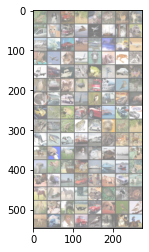

In [5]:
# Show random training images (default 4)
helper.DisplayImages(trainloader, classes)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  cat  ship  ship plane


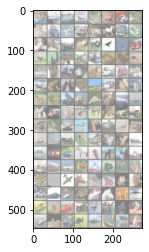

In [6]:
# Show random testing images (default 4)
helper.DisplayImages(testloader, classes)

In [7]:
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [9]:
#Display model summary
helper.DisplayModelSummary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
epochs = 50

In [11]:
#Training
Train(trainloader, model, criterion, optimizer, scheduler, device, epochs).train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,   391] loss: 501.870
[2,   391] loss: 289.443
[3,   391] loss: 200.671
[4,   391] loss: 144.808
[5,   391] loss: 96.315
[6,   391] loss: 65.836
[7,   391] loss: 38.286
[8,   391] loss: 30.966
[9,   391] loss: 23.167
[10,   391] loss: 14.693
[11,   391] loss: 11.056
[12,   391] loss: 8.669
[13,   391] loss: 6.329
[14,   391] loss: 3.210
[15,   391] loss: 1.453
[16,   391] loss: 0.634
[17,   391] loss: 0.311
[18,   391] loss: 0.230
[19,   391] loss: 0.197
[20,   391] loss: 0.179
[21,   391] loss: 0.164
[22,   391] loss: 0.156
[23,   391] loss: 0.140
[24,   391] loss: 0.139
[25,   391] loss: 0.120
[26,   391] loss: 0.117
[27,   391] loss: 0.109
[28,   391] loss: 0.111
[29,   391] loss: 0.104
[30,   391] loss: 0.097
[31,   391] loss: 0.103
[32,   391] loss: 0.096
[33,   391] loss: 0.099
[34,   391] loss: 0.099
[35,   391] loss: 0.102
[36,   391] loss: 0.098
[37,   391] loss: 0.095
[38,   391] loss: 0.095
[39,   391] loss: 0.099
[40,   391] loss: 0.100
[41,   391] loss: 0.106
[42,   391

In [12]:
#Testing
Test(testloader, model, criterion, device).test()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 87 %


In [13]:
helper.DisplayClassAccuracy(model, testloader, classes, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 93 %
Accuracy of   car : 85 %
Accuracy of  bird : 81 %
Accuracy of   cat : 52 %
Accuracy of  deer : 92 %
Accuracy of   dog : 81 %
Accuracy of  frog : 80 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 89 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

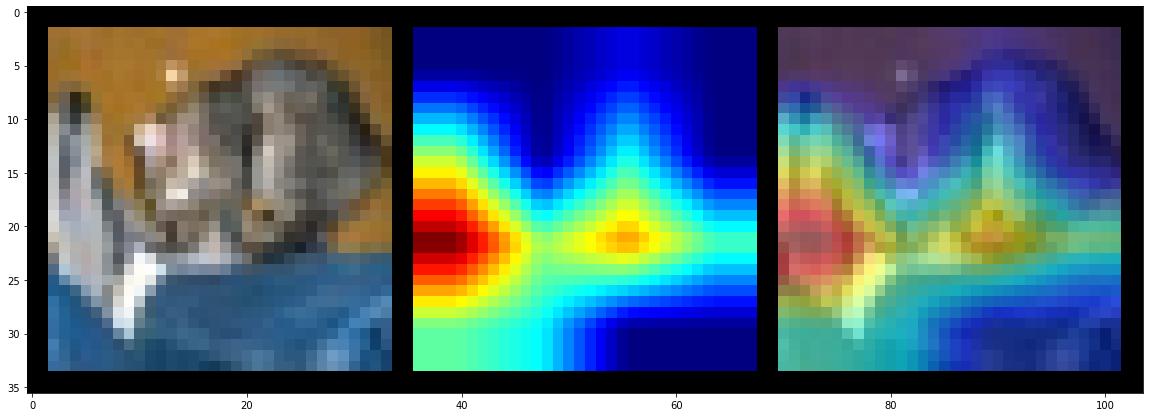

Prediction : cat, Actual : cat


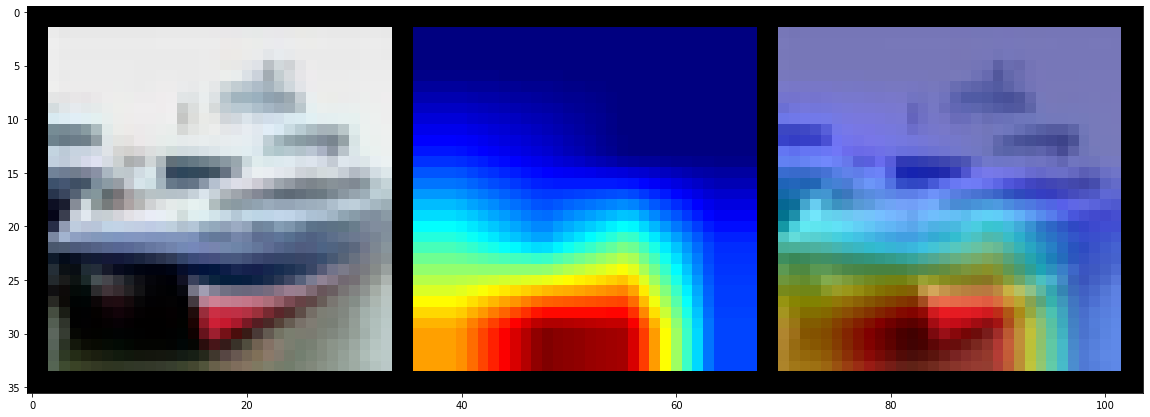

Prediction : ship, Actual : ship


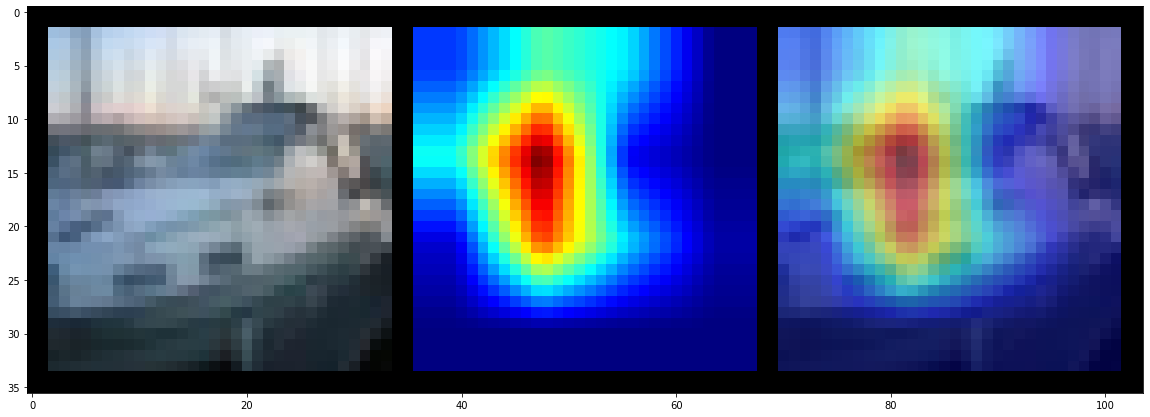

Prediction : ship, Actual : ship


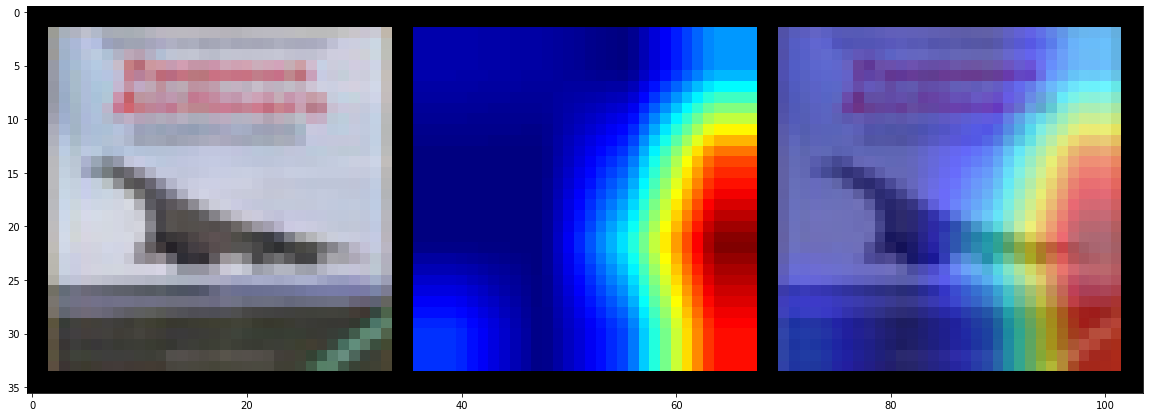

Prediction : plane, Actual : plane


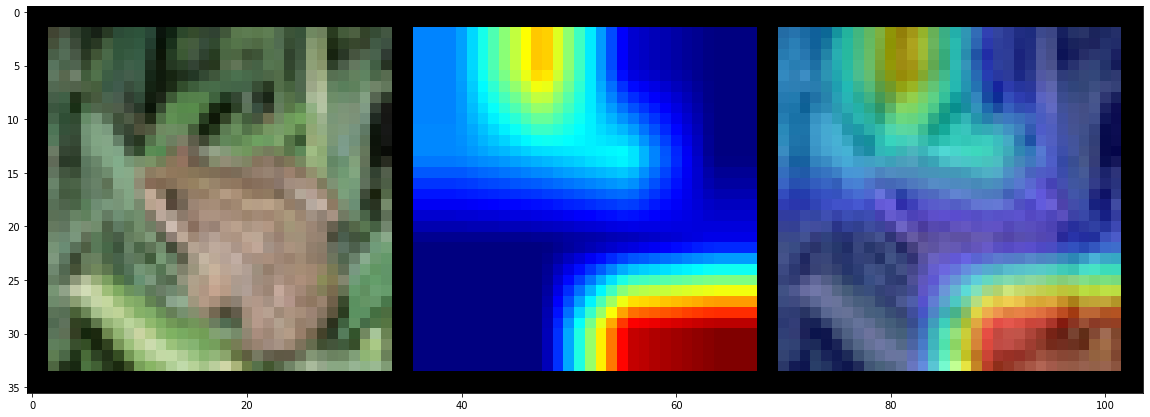

Prediction : frog, Actual : frog


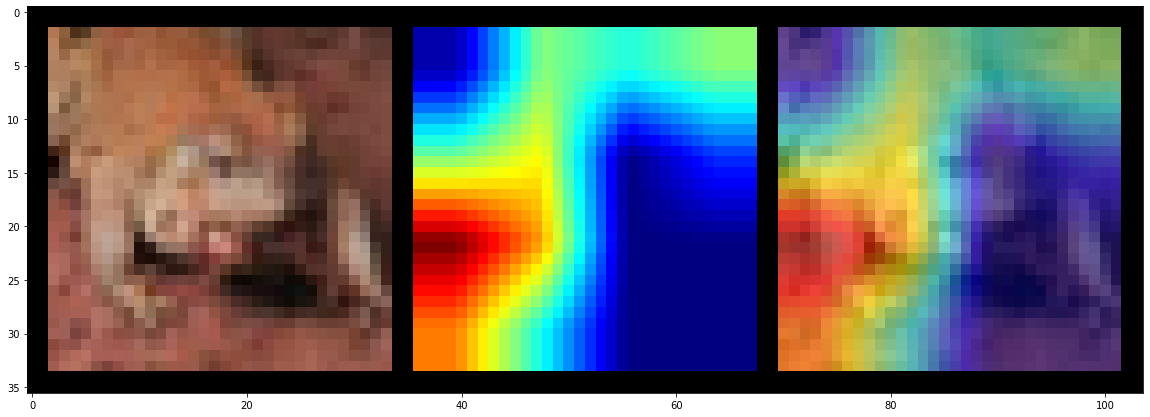

Prediction : frog, Actual : frog


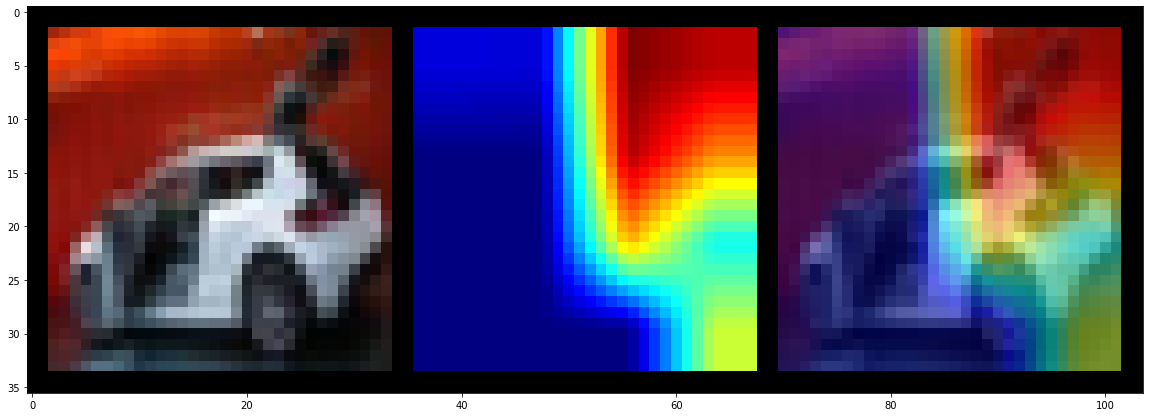

Prediction : car, Actual : car


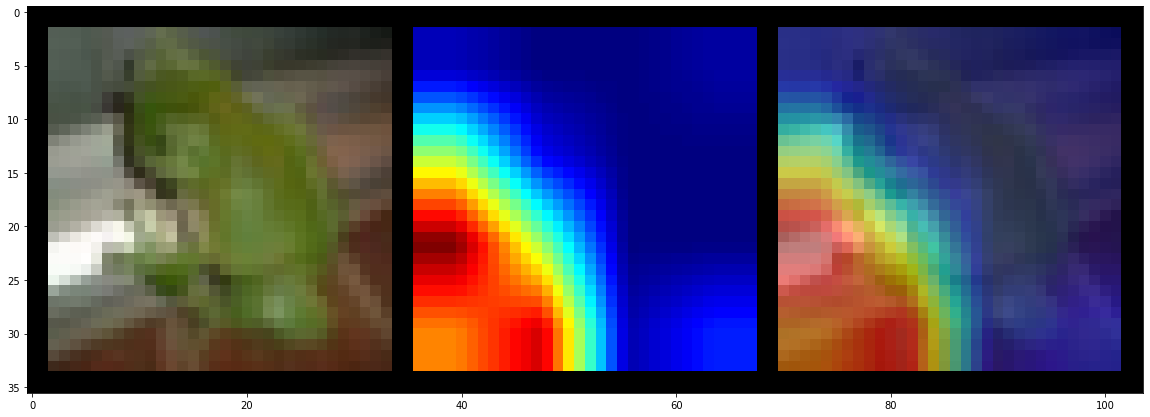

Prediction : frog, Actual : frog


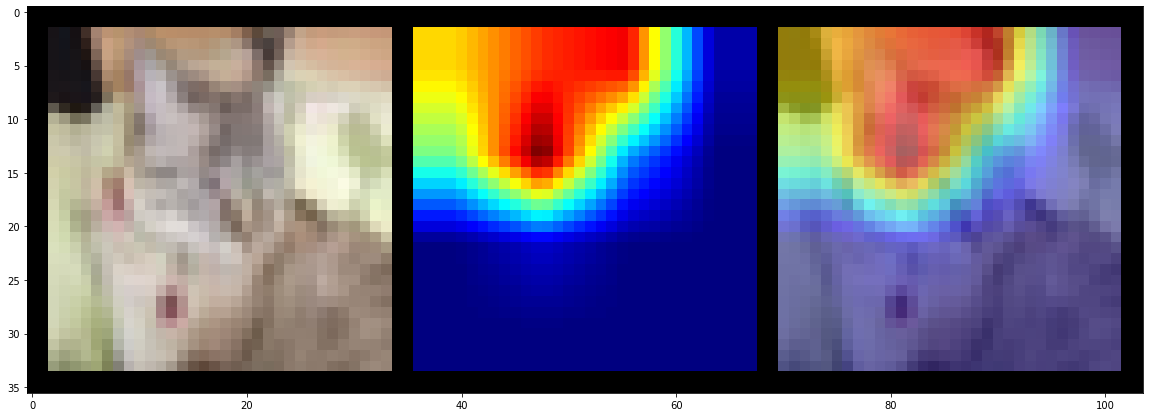

Prediction : cat, Actual : cat


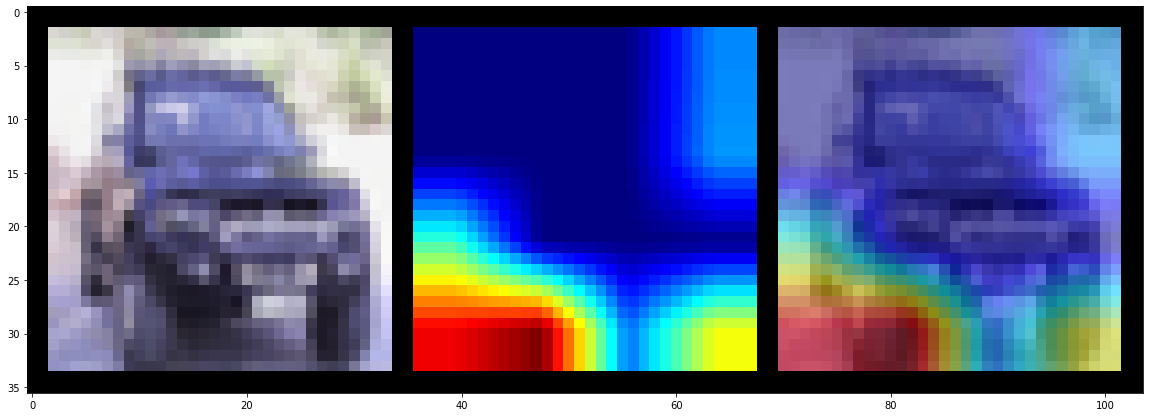

Prediction : car, Actual : car


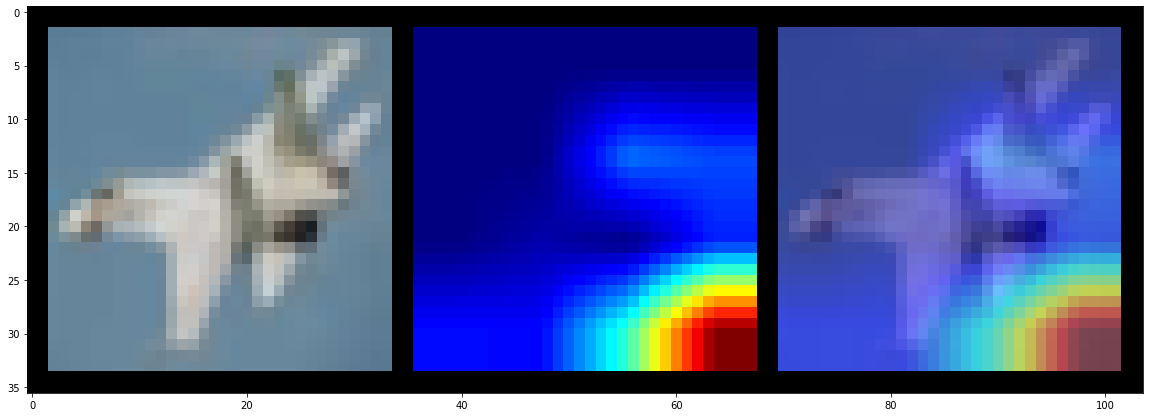

Prediction : plane, Actual : plane


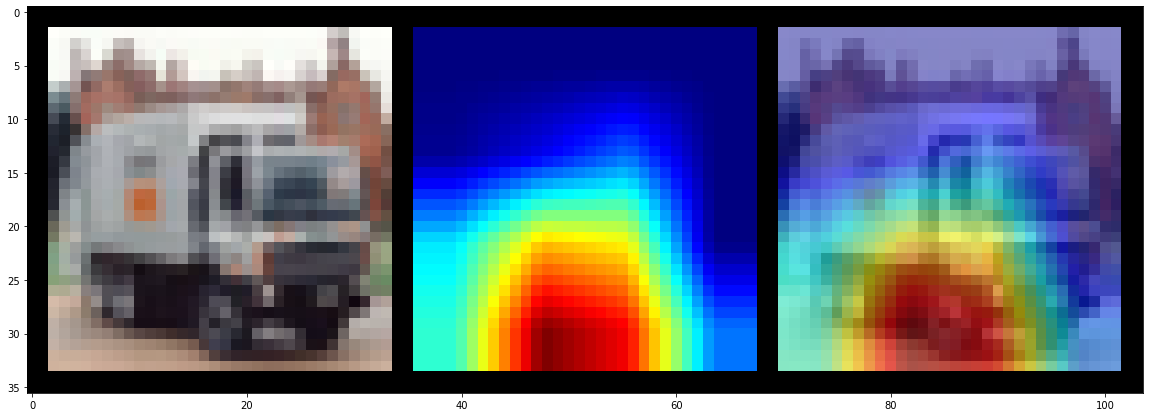

Prediction : truck, Actual : truck


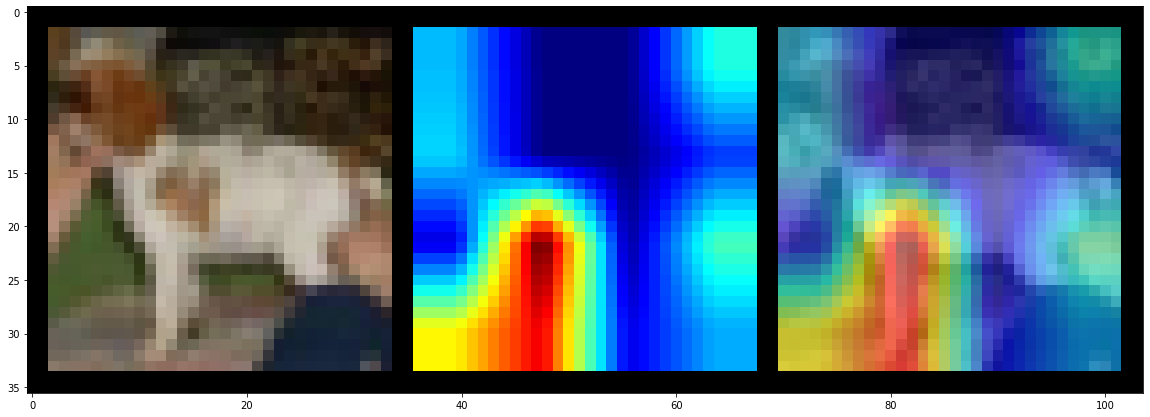

Prediction : dog, Actual : dog


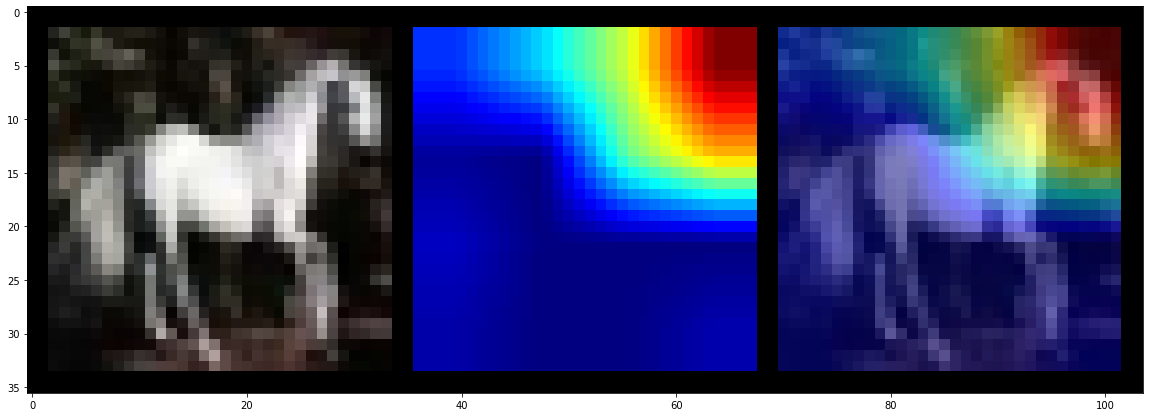

Prediction : horse, Actual : horse


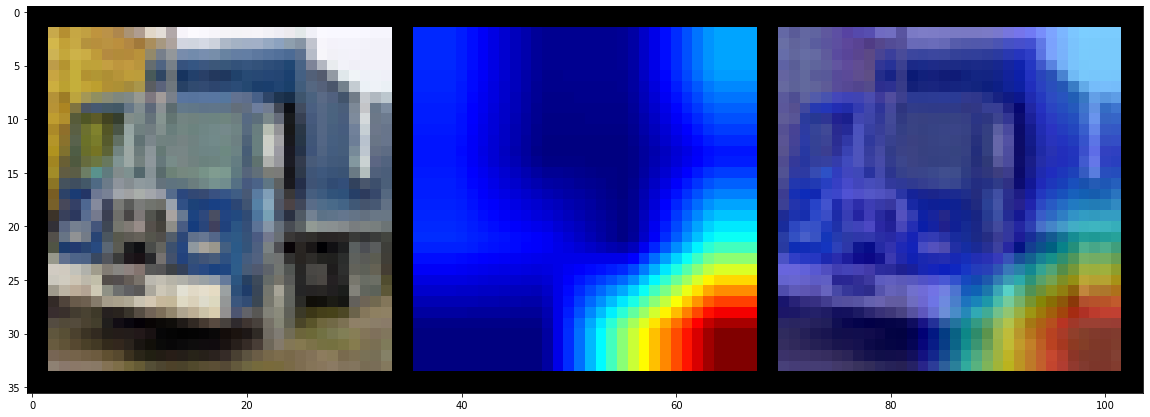

Prediction : truck, Actual : truck


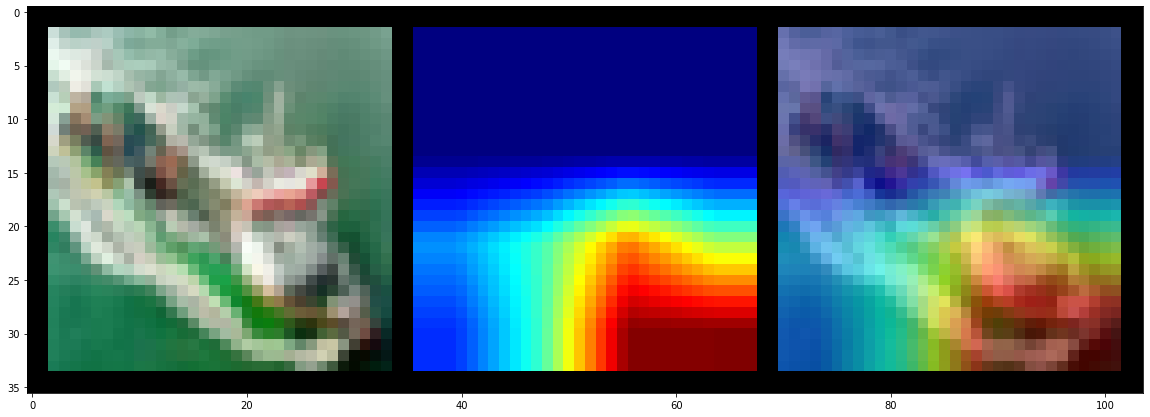

Prediction : ship, Actual : ship


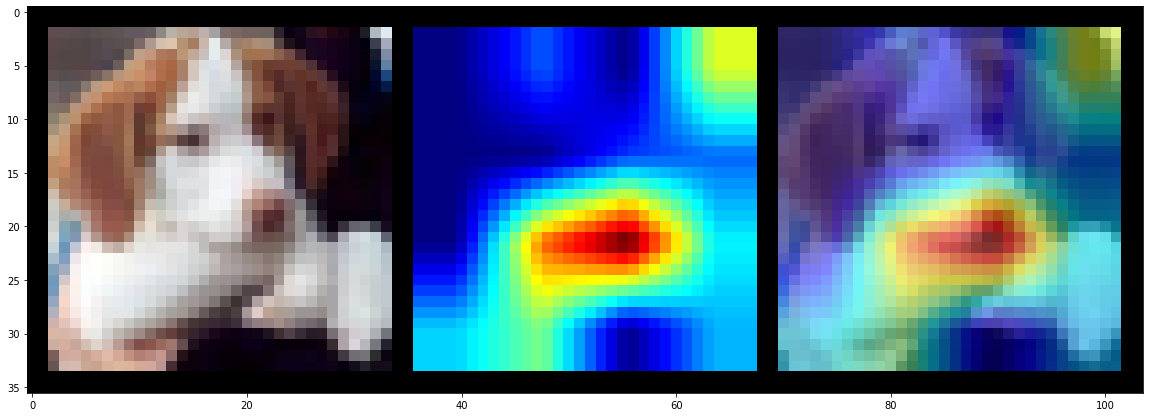

Prediction : dog, Actual : dog


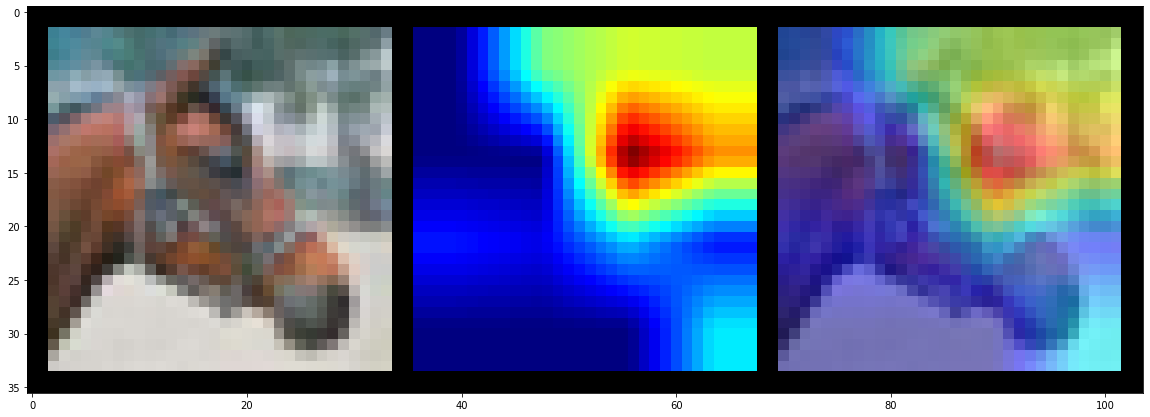

Prediction : horse, Actual : horse


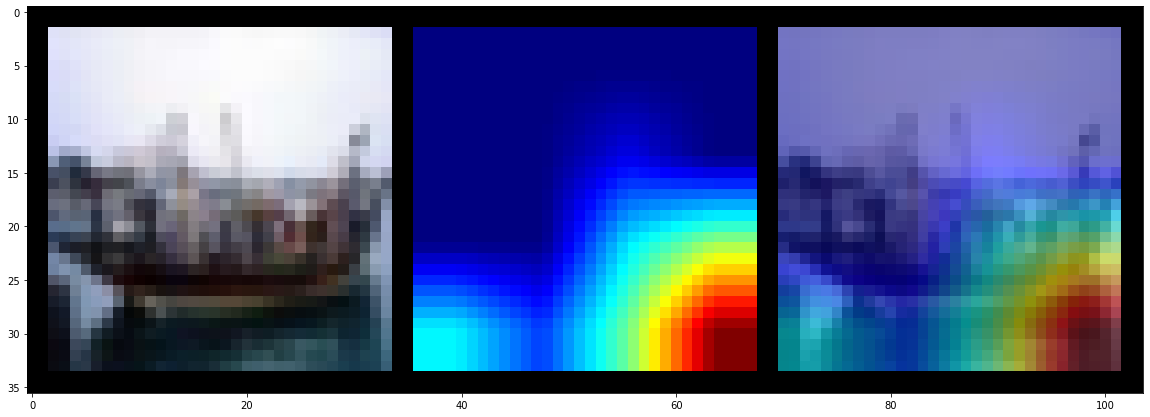

Prediction : ship, Actual : ship


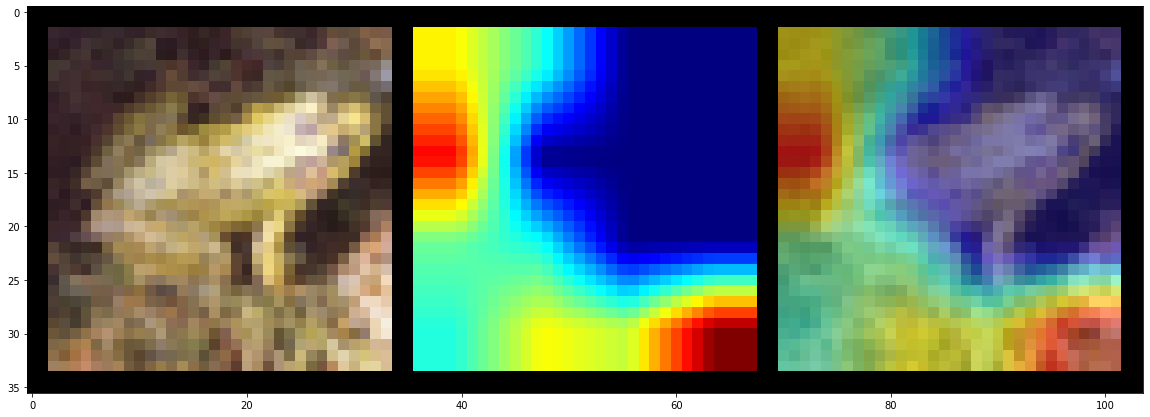

Prediction : frog, Actual : frog


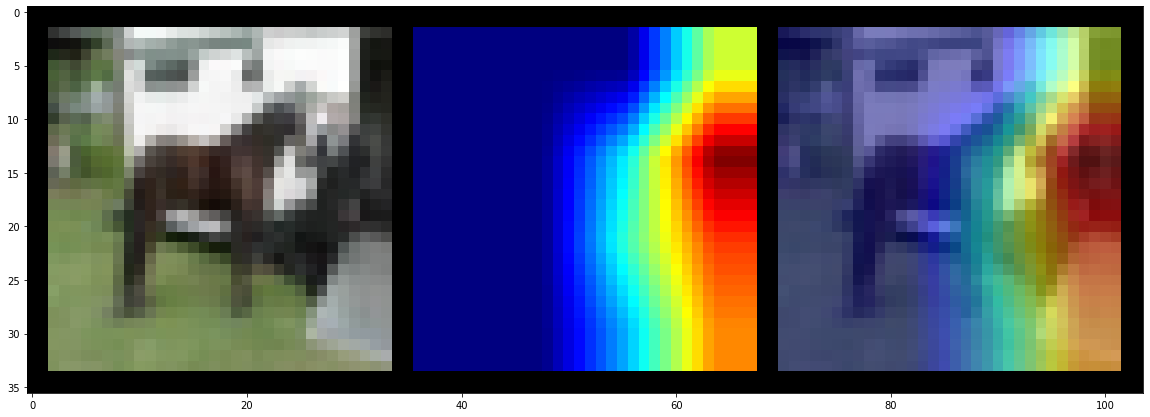

Prediction : horse, Actual : horse


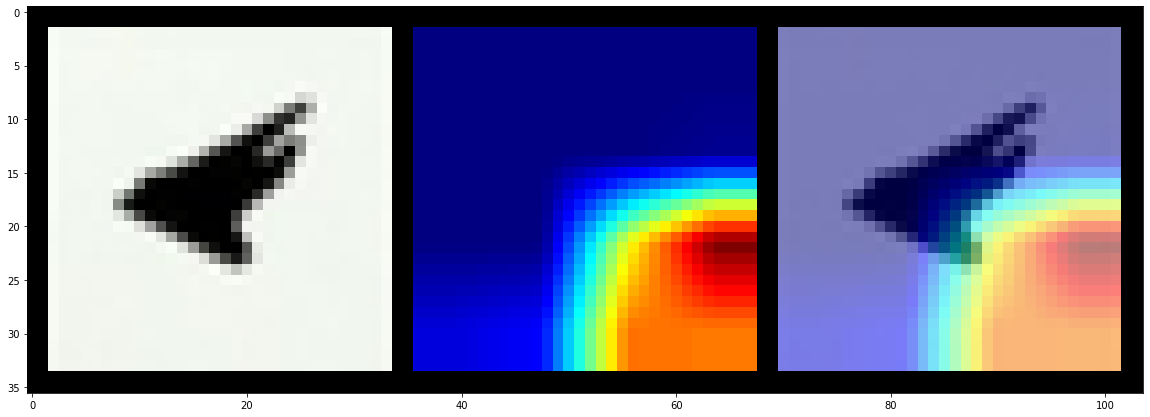

Prediction : plane, Actual : plane


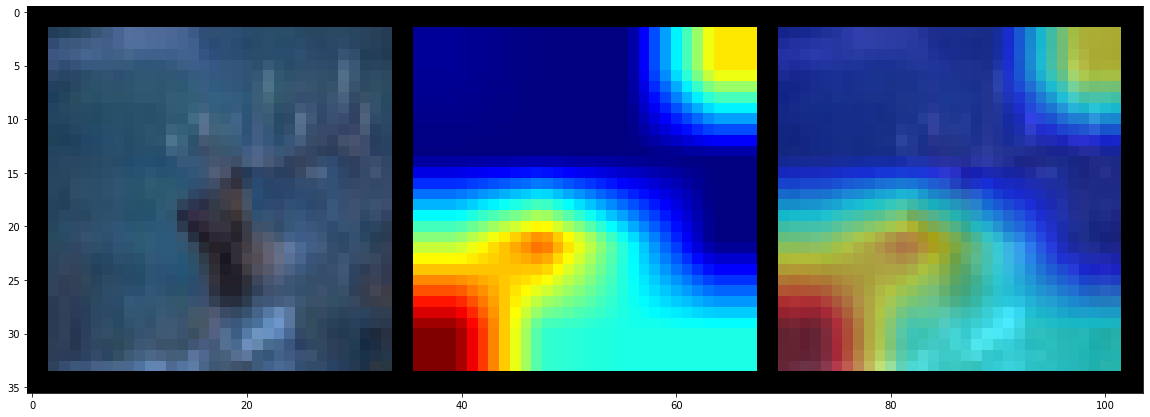

Prediction : deer, Actual : deer


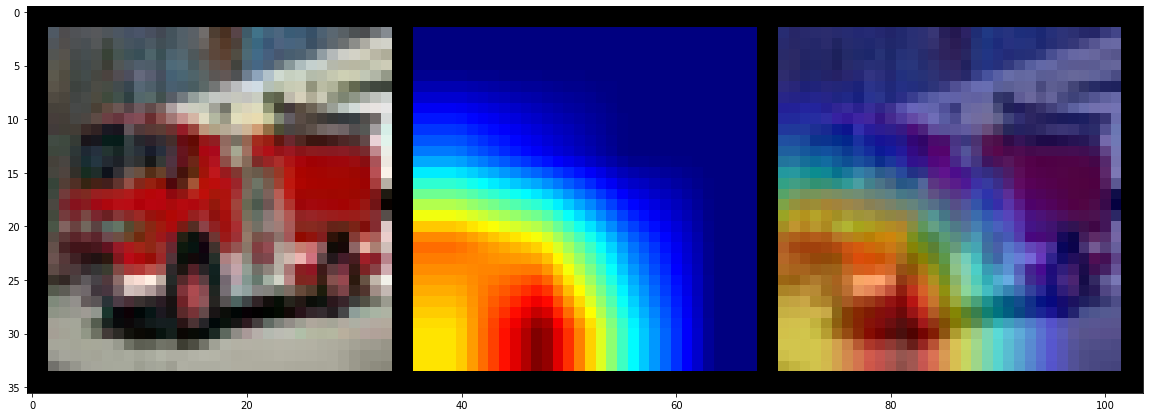

Prediction : truck, Actual : truck


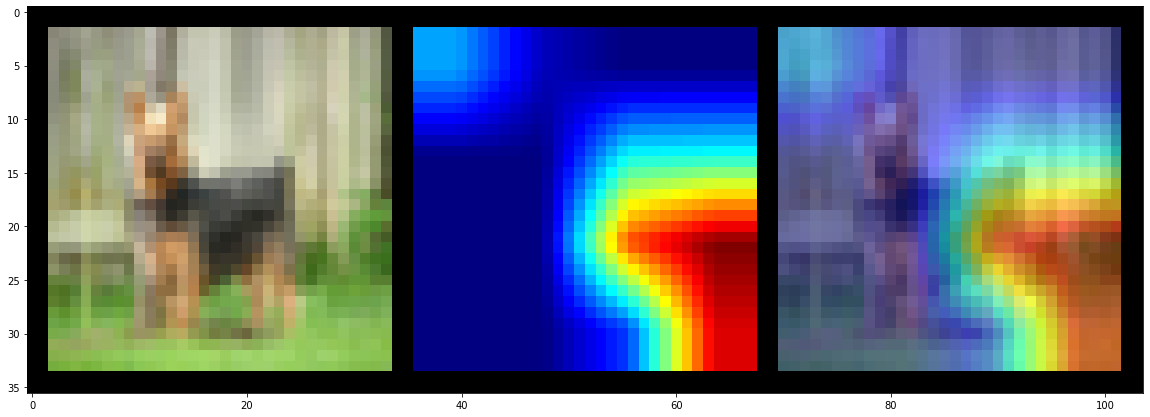

Prediction : deer, Actual : dog


In [14]:
helper.DisplayGradCamImages(model, 'resnet', 'layer4', testloader, classes, device, 25)